<a href="https://colab.research.google.com/github/tomasplsek/AstroML/blob/main/03_sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine learning for astronomers in Python**




# 3. hands-on session: **Classification problem: from *Data* to *Inference***

## **Contents**

1. Obtain (good) data
1. Preprocess the data
1. Select features & reduce dimensions
1. Find best hyperparameters
1. Closs-validate
1. Compare classifiers
1. Combine classifiers
1. Predict

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Obtain (good) data**

- enough datapoints
- distinguishable features
- not so much omitted datapoints
- representant dataset
- unbiased dataset

### **Random points**

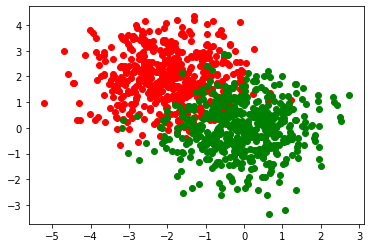

In [2]:
# generate data
dist1 = np.random.multivariate_normal([-2, 2], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

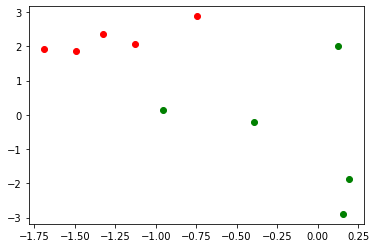

In [3]:
# generate data
dist1 = np.random.multivariate_normal([-2, 2], [[1, 0], [0, 1]], size=5)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=5)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

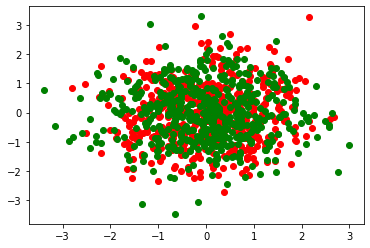

In [4]:
# generate data
dist1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

,Height,Width,Species
0,26,nan,Dog
1,28,19,Dog
2,42,24,Dog
3,23,nan,Dog
4,31,11,Dog
5,40,9.9,Dog
6,24,nan,Dog
7,34,15,Dog
8,22,10,Dog
9,25,nan,Dog


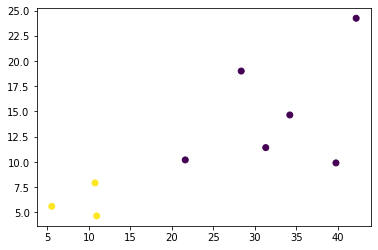

In [5]:
X1 = np.hstack((np.random.uniform(15, 50, size=10), 
                np.random.uniform(5, 20, size=4)))

X2 = np.hstack((np.random.uniform(8, 30, size=10), 
                np.random.uniform(3, 10, size=4)))

X2[::3] = np.nan

y = 10*["Dog"] + 4*["Cat"]
labels = 10*[0] + 4*[1]

plt.scatter(X1, X2, c=labels)

pd.options.display.float_format = "{:,.2g}".format
pd.DataFrame({"Height" : X1, "Width" : X2, "Species" : y})

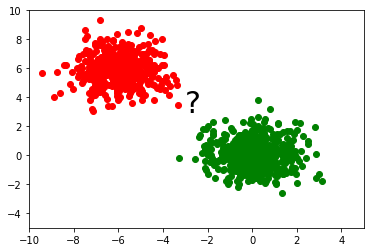

In [6]:
# generate data
dist1 = np.random.multivariate_normal([-6, 6], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

plt.xlim(-10, 5)
plt.ylim(-5, 10)
plt.text(-3, 3, "?", fontsize=30);

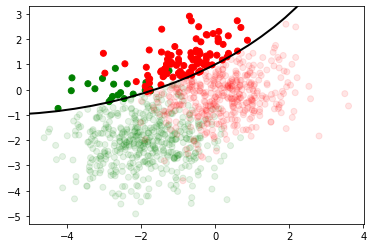

In [7]:
# generate data
dist1 = np.random.multivariate_normal([-2, -2], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
x0, y0, r = -6, 9, 10
opacities1 = np.where(np.sqrt((dist1[:,0]-x0)**2 + (dist1[:,1]-y0)**2) < r, 1, 0.1)
colors1 = np.ones((500,3)) * np.array([0, 128, 0]) / 255
colors1 = np.column_stack((colors1, opacities1))

opacities2 = np.where(np.sqrt((dist2[:,0]-x0)**2 + (dist2[:,1]-y0)**2) < r, 1, 0.1)
colors2 = np.ones((500,3)) * np.array([255, 0, 0]) / 255
colors2 = np.column_stack((colors2, opacities2))

fig, ax = plt.subplots()
ax.scatter(dist1[:, 0], dist1[:, 1], c=colors1)
ax.scatter(dist2[:, 0], dist2[:, 1], c=colors2);

circle = plt.Circle((x0, y0), r, color="black", fill=False, lw=2)
ax.add_artist(circle);

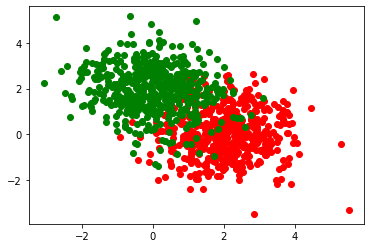

In [8]:
# generate data
dist1 = np.random.multivariate_normal([2, 0], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 2], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

### **Random points with scikit-learn**

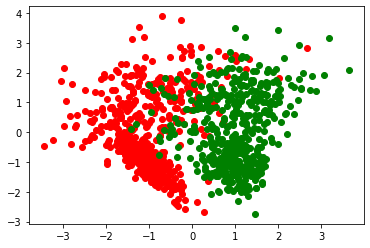

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, 
                           n_classes=2, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           random_state=666)

i1, i2 = y == 0, y == 1

plt.scatter(X[:, 0][i1], X[:, 1][i1], color='red')
plt.scatter(X[:, 0][i2], X[:, 1][i2], color='green');

### **[Scikit-learn datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)**

#### **Iris dataset**

![](https://www.aifunded.es/images/iris.png)

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

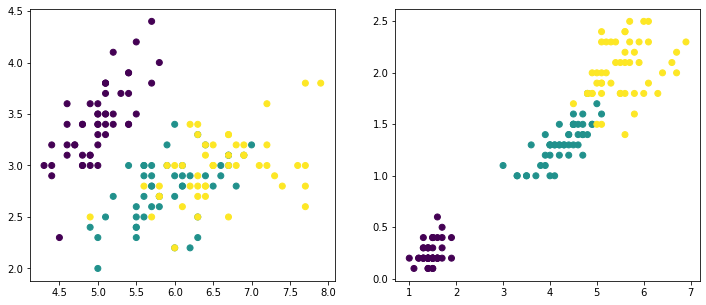

In [10]:
from sklearn.datasets import load_iris # kosatec

iris = load_iris()
X, y = iris["data"], iris["target"]

#X, y = load_iris(return_X_y = True)

i1, i2, i3 = y==0, y==1, y==2

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c=y)

iris["target_names"], iris["feature_names"]

In [11]:
!pip install corner
import corner

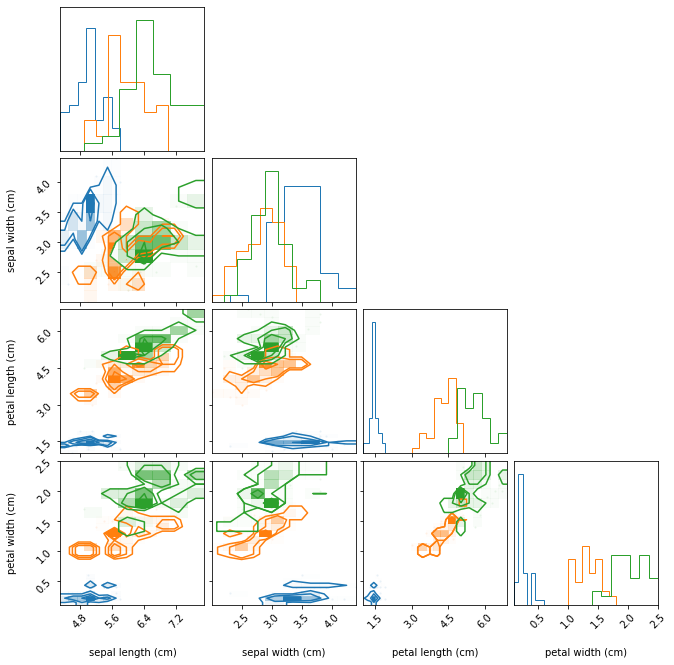

In [12]:
df = pd.DataFrame(data=iris["data"],
                  columns=iris["feature_names"])

df_1 = df[iris["target"] == 0]
df_2 = df[iris["target"] == 1]
df_3 = df[iris["target"] == 2]

kw = {"bins" : [7, 7, 7, 7]}
fig = corner.corner(df_1, color="C0", **kw)
corner.corner(df_2, fig=fig, color="C1", **kw)
corner.corner(df_3, fig=fig, color="C2", **kw);

#### **Digits**

(1797, 64)

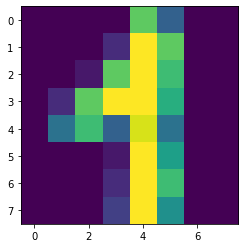

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.imshow(digits.data[42].reshape(8,8));
digits.data.shape

(60000, 28, 28)

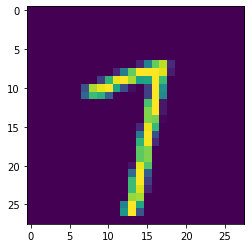

In [14]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

plt.imshow(x_train[42]);
x_train.shape

#### **Califoria housing prices dataset**

In [15]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data["data"], columns=data['feature_names'])
X["MedHouseVal"] = data["target"]

pd.reset_option("display.float_format")
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


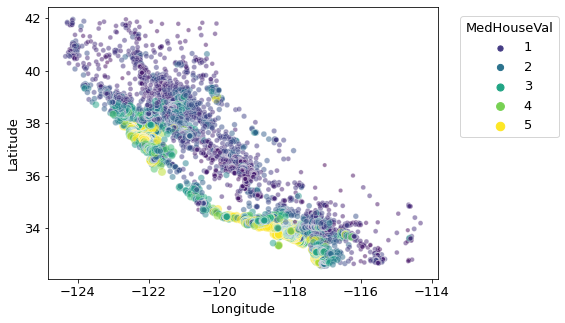

In [16]:
import seaborn as sns

plt.figure(figsize=(7,5))
plt.rc("font", size=13)
sns.scatterplot(data=X, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.04, 0.99), loc="upper left");

### **Other datasets**

[Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

[Keras](https://keras.io/api/datasets/)

[Kaggle](https://www.kaggle.com/datasets)

[OpenML](https://www.openml.org/search?type=data)

### **Our dataset**

SDSS data of point sources: stars vs Quasi-stellar objects

<img src="https://cdn.mos.cms.futurecdn.net/HgaCHZDNppE6e52yeDACo6-970-80.jpg.webp" height=200>

<img src="https://earthsky.org/upl/2021/01/supermassive-black-hole-artist-e1610556964639.jpg" height=200 align=right>



In [17]:
!wget -c "https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB" -O "sdss_photo.csv"

--2021-11-04 14:13:43--  https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving drive.google.com (drive.google.com)... 142.250.188.46, 2607:f8b0:4004:835::200e
Connecting to drive.google.com (drive.google.com)|142.250.188.46|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1r5idnoia0uu3d1na76ns05i52s5uqn7/1636035150000/12667160157784747384/*/1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB [following]
--2021-11-04 14:13:44--  https://doc-04-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1r5idnoia0uu3d1na76ns05i52s5uqn7/1636035150000/12667160157784747384/*/1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB
Resolving doc-04-2s-docs.googleusercontent.com (doc-04-2s-docs.googleusercontent.com)... 172.217.164.161, 2607:f8b0:4004:815::2001
Connecting to doc-04-2s-docs.googleusercontent.com (doc-04-2s-docs.googleusercontent.com)|172.217.164.16

In [18]:
data = pd.read_csv("sdss_photo.csv")

## **Data preprocessing**

### What to do with the data:
- look at the data
- check data quality
- understand the data
- think of selection biases

In [19]:
data

,mag_u,mag_g,mag_r,mag_i,mag_z,target,u-g,g-r,r-i,i-z
0,19.240999,17.525999,16.840000,16.613001,16.492001,star,1.715000,0.685999,0.226999,0.121000
1,19.732000,18.339001,17.767000,17.580000,17.481001,star,1.393000,0.572001,0.187000,0.098999
2,16.120001,15.232000,14.933000,14.845000,14.827000,star,0.888000,0.299001,0.087999,0.018001
3,18.995001,18.150999,17.877001,17.747000,17.766001,star,0.844002,0.273998,0.130001,-0.019001
4,19.032000,18.112000,17.848000,17.709999,17.712000,star,0.920000,0.264000,0.138000,-0.002001
...,...,...,...,...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,QSO,0.199999,0.384001,0.035999,-0.043999
863,26.433001,21.429001,20.261000,20.108000,20.073000,QSO,5.004000,1.168001,0.153000,0.035000
864,20.535999,20.200001,20.292999,19.910000,19.726000,QSO,0.335999,-0.092999,0.382999,0.184000
865,20.627001,20.583000,20.270000,20.229000,20.190001,QSO,0.044001,0.313000,0.041000,0.039000


In [22]:
data.describe().round(2)

,mag_u,mag_g,mag_r,mag_i,mag_z,u-g,g-r,r-i,i-z
count,867.00,867.00,867.00,867.00,867.00,867.00,867.00,867.00,867.00
mean,19.29,18.17,17.72,17.54,17.45,1.12,0.46,0.18,0.09
std,1.39,1.33,1.35,1.37,1.38,0.67,0.31,0.13,0.10
min,15.67,14.36,14.12,13.95,13.89,-0.95,-0.20,-0.21,-0.42
25%,18.50,17.29,16.74,16.54,16.45,0.84,0.26,0.11,0.03
50%,19.33,18.33,17.88,17.69,17.62,1.09,0.44,0.17,0.08
75%,20.02,19.09,18.76,18.61,18.52,1.46,0.60,0.25,0.14
max,26.43,25.17,21.14,20.72,20.91,5.06,4.03,1.21,0.56


In [23]:
sum(data["target"] == "star"), sum(data["target"] == "QSO")

(655, 212)

#### task 1: **create `X` and `y`**

#### task 2: **plot the data**

#### task 3: **classify with SVC & test score**

In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

model = SVC(kernel="linear")

#### task 4: **rescale the data -> `X_scaled` & test score**

In [88]:
X_scaled = X.copy()

## **Feature selection & dimensionality reduction**

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
clf = ExtraTreesClassifier(random_state=42).fit(X,y)
clf.feature_importances_

array([0.29715325, 0.11687197, 0.21442021, 0.19203806, 0.17951651])

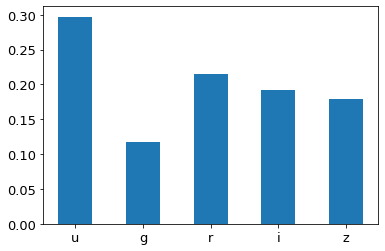

In [47]:
plt.bar(np.arange(5), clf.feature_importances_, 0.5)
plt.xticks(np.arange(5), X.columns);

#### task 5: **calculate spectral indices -> `X_new` & test importance**

In [89]:
X_new = X.copy()
X_new["new"] = np.ones(len(X_new.u))
X_new

,u,g,r,i,z,new
0,19.240999,17.525999,16.840000,16.613001,16.492001,1.0
1,19.732000,18.339001,17.767000,17.580000,17.481001,1.0
2,16.120001,15.232000,14.933000,14.845000,14.827000,1.0
3,18.995001,18.150999,17.877001,17.747000,17.766001,1.0
4,19.032000,18.112000,17.848000,17.709999,17.712000,1.0
...,...,...,...,...,...,...
862,19.247000,19.047001,18.663000,18.627001,18.671000,1.0
863,26.433001,21.429001,20.261000,20.108000,20.073000,1.0
864,20.535999,20.200001,20.292999,19.910000,19.726000,1.0
865,20.627001,20.583000,20.270000,20.229000,20.190001,1.0


#### task 6: **test score for *u-r* spectral index**

#### task 7: **create dummy column & test importance**

### **Principal component analysis**

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_n = pca.fit_transform(X)

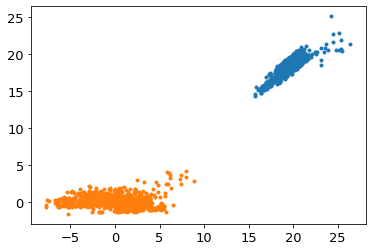

In [59]:
plt.plot(X.u, X.g, ".")
plt.plot(X_n[:,0], X_n[:,1], ".")

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, 
                                                    stratify=y, 
                                                    random_state=42)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9631336405529954

## **Tune hyperparameters**

In [61]:
SVC?

#### task 8: **find SVC hyperparameters with best test score**

## **Crossvalidate**

In [68]:
from sklearn.model_selection import cross_validate

In [69]:
model = SVC(kernel="rbf", C=1000)

res = cross_validate(model, X, y, cv=10)

np.mean(res["test_score"]), np.std(res["test_score"])

(0.98040630847367, 0.012683091315102809)

### **Grid-search + crossvalidation**

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
clf = SVC()
params = {"C" : [0.01, 0.1, 1, 10, 100],
          "kernel" : ["linear", "poly", "rbf"]}#,
          #"gamma" : ["scale", "auto"]}
model = GridSearchCV(clf, params, cv=5, n_jobs=8)
model.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
model.cv_results_

{'mean_fit_time': array([ 0.03289309,  0.75745916,  0.07324104,  0.03523169,  3.88805909,
         0.0637609 ,  0.03977938, 17.00119848,  0.03582358,  0.08575797,
        22.19215889,  0.04136014,  0.38689542, 21.95765085,  0.04090886]),
 'mean_score_time': array([0.01102381, 0.00749578, 0.02249055, 0.00529971, 0.01057339,
        0.01616697, 0.00638475, 0.00890236, 0.01199656, 0.00593567,
        0.00281076, 0.00955348, 0.00900517, 0.00495229, 0.004354  ]),
 'mean_test_score': array([0.88470534, 0.96194273, 0.75548469, 0.93543951, 0.97117799,
        0.94581091, 0.9458242 , 0.97463291, 0.96541094, 0.94812969,
        0.97810112, 0.98039333, 0.94927912, 0.9769517 , 0.97925055]),
 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10,
                    100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=ob

In [73]:
params, score = model.cv_results_["params"], model.cv_results_["mean_test_score"]

indices = np.argsort(score)

for i in indices:
    print(params[i], score[i].round(3))

{'C': 0.01, 'kernel': 'rbf'} 0.755
{'C': 0.01, 'kernel': 'linear'} 0.885
{'C': 0.1, 'kernel': 'linear'} 0.935
{'C': 0.1, 'kernel': 'rbf'} 0.946
{'C': 1, 'kernel': 'linear'} 0.946
{'C': 10, 'kernel': 'linear'} 0.948
{'C': 100, 'kernel': 'linear'} 0.949
{'C': 0.01, 'kernel': 'poly'} 0.962
{'C': 1, 'kernel': 'rbf'} 0.965
{'C': 0.1, 'kernel': 'poly'} 0.971
{'C': 1, 'kernel': 'poly'} 0.975
{'C': 100, 'kernel': 'poly'} 0.977
{'C': 10, 'kernel': 'poly'} 0.978
{'C': 100, 'kernel': 'rbf'} 0.979
{'C': 10, 'kernel': 'rbf'} 0.98


In [74]:
model.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## **Compare classifiers**

In [75]:
from sklearn.neural_network import MLPClassifier # multi-layer perceptron classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [76]:
classifiers = [MLPClassifier(max_iter=1000),
               GaussianNB(),
               DecisionTreeClassifier(),
               KNeighborsClassifier(),
               SVC(kernel="rbf", C=10)]

for classifier in classifiers:
    classify(X, y, classifier)

0.977
0.779
0.959
0.968
0.986


In [77]:
clf = MLPClassifier(max_iter=1000)
params = {"hidden_layer_sizes" : [5, 10, 50, 100],
          "activation" : ["identity", "logistic", "tanh", "relu"],
          "solver" : ["sgd", "adam"]}
model = GridSearchCV(clf, params, cv=5, n_jobs=8)
model.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'

In [78]:
model.best_estimator_, model.best_score_

(MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=50, learning_rate='constant',
               learning_rate_init=0.001, max_fun=15000, max_iter=1000,
               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
               power_t=0.5, random_state=None, shuffle=True, solver='adam',
               tol=0.0001, validation_fraction=0.1, verbose=False,
               warm_start=False), 0.9504285429539566)

In [79]:
%time MLPClassifier(hidden_layer_sizes=10, max_iter=1000, solver='sgd').fit(X_train, y_train).score(X_test, y_test)

CPU times: user 1.33 s, sys: 1.74 ms, total: 1.33 s
Wall time: 1.34 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9723502304147466

In [80]:
%time SVC(C=10).fit(X_train, y_train).score(X_test, y_test)

CPU times: user 4.99 ms, sys: 0 ns, total: 4.99 ms
Wall time: 5.78 ms


0.9861751152073732

## **Ensemble methods**

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = RandomForestClassifier()

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9665196471531677, 0.01589183257241371)

In [83]:
from sklearn.ensemble import StackingClassifier

In [84]:
classifiers = [("MLP", MLPClassifier(max_iter=1000, random_state=42)),
               ("Bayes", GaussianNB()),
               ("RFC", RandomForestClassifier()),
               ("KNN", KNeighborsClassifier()),
               ("SVC", SVC(C=10))]

model = StackingClassifier(classifiers)

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.9780673616680031, 0.013099254486727276)

In [85]:
classifiers = [("MLP", MLPClassifier(max_iter=1000, random_state=42)),
               ("Bayes", GaussianNB()),
               ("DTC", DecisionTreeClassifier()),
               ("KNN", KNeighborsClassifier()),
               ("SVC", SVC(C=10))]

# train the model
clf = StackingClassifier(classifiers)

model = make_pipeline(StandardScaler(),
                      clf)

res = cross_validate(model, X, y, cv=10)
np.mean(res["test_score"]), np.std(res["test_score"])

(0.980379577653034, 0.010401999270797655)

## **Conclusion**

In [86]:
classifiers = [("MLP", MLPClassifier(max_iter=1000, random_state=42)),
               ("Bayes", GaussianNB()),
               ("DTC", DecisionTreeClassifier()),
               ("KNN", KNeighborsClassifier()),
               ("SVC", SVC(C=10))]

# train the model
clf = StackingClassifier(classifiers)

model = make_pipeline(StandardScaler(),
                      clf)

model.fit(X_new[["u-g"]], y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('stackingclassifier',
                 StackingClassifier(cv=None,
                                    estimators=[('MLP',
                                                 MLPClassifier(activation='relu',
                                                               alpha=0.0001,
                                                               batch_size='auto',
                                                               beta_1=0.9,
                                                               beta_2=0.999,
                                                               early_stopping=False,
                                                               epsilon=1e-08,
                                                               hidden_layer_sizes=(100,),
                                                               learning_rate='con

In [87]:
u = 21
g = 20

pred = model.predict(np.array([u-g]).reshape(-1,1))

le.inverse_transform(pred)

array(['star'], dtype=object)

# **OpenAI**

In [ ]:
'''
1. generate 2 dimesional data with two distinct classes.
2. scale the using min-max scaler.
3. classify the data using random forest classifier.
4. find best hyperparameters using grid search.
'''